In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

from linear_modeling import *

### Load data and sample metadata

In [2]:
data_path = os.path.join(
    os.getcwd(),
    "..",
    "data",
    "S_cereviseae_compendia_recount_bio"
)

In [3]:
with open(
        os.path.join(data_path, 'aggregated_metadata.json'), 'r') as jsonfile:
    metadata_file = json.load(jsonfile)

tables = {}
for k, v in metadata_file['experiments'].items():
    tables[v["accession_code"]] = v
    
metadata = pd.DataFrame(tables).T

In [4]:
data = pd.read_csv(os.path.join(data_path, "SACCHAROMYCES_CEREVISIAE.tsv"), sep="\t", header=0, index_col=0).T
print("Loaded data with dimensions:", str(data.shape))

Loaded data with dimensions: (12428, 5370)


### Load gene metadata

In [5]:
# Get metadata for genes and extract genes with "transporter" annotation
gene_mapper = pd.read_csv(os.path.join(
    os.getcwd(),
    "..",
    "data",
    "yeast_orf_dict.csv"
), header=None, names=["id", "symbol", "name", "description"])

transporters = gene_mapper.loc[gene_mapper["description"].str.contains("transporter")]
transporters_list = transporters["id"].tolist()

In [6]:
gene_map = {}
for i, r in gene_mapper.iterrows():
    _id = str(r["id"])
    _name = str(r["symbol"])
    if _name != "nan":
        gene_map[_id] = _name
    else:
        gene_map[_id] = _id

In [7]:
# Get ID for transporter
_name = "CTP1"
_this = transporters.loc[transporters["symbol"] == _name]["id"].tolist()[0]

In [8]:
def split_data(data, label_names, test_fraction=0.2, random_state=42):
    """Split input data into training and testing sets
    
    data        <pd.DataFrame> : Expects dataframe with genes as columns and samples as rows
    label_names <array>        : List of name(s) that are labels
    """
    
    test = data.sample(
        frac=test_fraction, 
        random_state=random_state,
        axis=0)
    train = data.loc[~data.index.isin(test.index)]
    
    X_test = test[test.columns.difference(label_names)]
    y_test = test[label_names]
    
    X_train = train[train.columns.difference(label_names)]
    y_train = train[label_names]
    
    feature_labels = [X_test.columns.tolist(), y_test.columns.tolist()]
    
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), feature_labels

In [9]:
X_train, X_test, y_train, y_test, feature_labels = split_data(data, [_this], test_fraction=0.3)

Initializing zero weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 7.204, MSE: 2078.638, R_sq: 0.299
	Iteration: 2, Change in weights: 2938.024, MSE: 3371.902, R_sq: 0.166
	Iteration: 3, Change in weights: 37113.022, MSE: 2467.937, R_sq: 0.146
	Iteration: 4, Change in weights: 199469.97, MSE: 1518.653, R_sq: 0.0
	Iteration: 5, Change in weights: 906304.296, MSE: 1516.101, R_sq: nan
	Iteration: 6, Change in weights: 185.245, MSE: 1516.101, R_sq: nan
	Iteration: 7, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.


Text(0, 0.5, 'MSE')

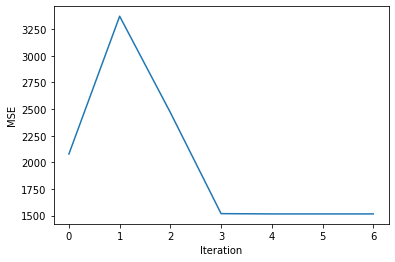

In [10]:
final_weights1, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="zero", 
    regression_type="logistic")

plt.plot([i for i in range(len(mse_record))], mse_record)
plt.xlabel("Iteration")
plt.ylabel("MSE")

Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 8307.106, MSE: 2669.438, R_sq: 0.001
	Iteration: 2, Change in weights: 57872.008, MSE: 1892.826, R_sq: 0.036
	Iteration: 3, Change in weights: 355317.965, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 790882.895, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.


Text(0, 0.5, 'MSE')

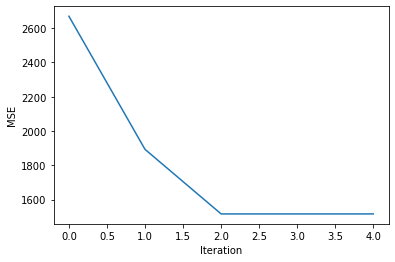

In [11]:
final_weights2, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="random", 
    regression_type="logistic",
    gaussian_sd=0.2)

plt.plot([i for i in range(len(mse_record))], mse_record)
plt.xlabel("Iteration")
plt.ylabel("MSE")

Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 581348.519, MSE: 1535.293, R_sq: 0.002
	Iteration: 2, Change in weights: 947167.213, MSE: 1516.101, R_sq: nan
	Iteration: 3, Change in weights: 6618.266, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.


Text(0, 0.5, 'MSE')

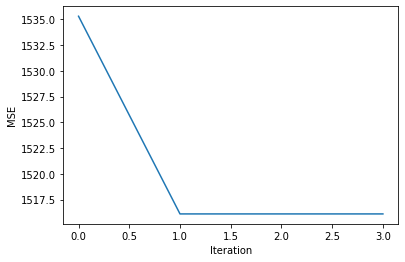

In [12]:
final_weights3, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="random", 
    regression_type="logistic",
    gaussian_sd=0.2,
    regularizer=2)

plt.plot([i for i in range(len(mse_record))], mse_record)
plt.xlabel("Iteration")
plt.ylabel("MSE")

Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 358449.718, MSE: 1584.452, R_sq: 0.014
	Iteration: 2, Change in weights: 611140.43, MSE: 1516.101, R_sq: nan
	Iteration: 3, Change in weights: 577179.865, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.


Text(0, 0.5, 'MSE')

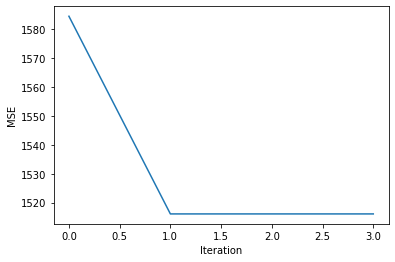

In [13]:
final_weights4, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="random", 
    regression_type="logistic",
    gaussian_sd=0.2,
    regularizer=0.2)

plt.plot([i for i in range(len(mse_record))], mse_record)
plt.xlabel("Iteration")
plt.ylabel("MSE")

In [14]:
data.corr()[_this].sort_values()

YGR237C   -0.470027
YOR014W   -0.454967
YJL005W   -0.440416
YJL154C   -0.440271
YDR028C   -0.429714
             ...   
YIR034C    0.558026
YMR241W    0.579124
YNR050C    0.663363
YIL094C    0.692440
YBR291C    1.000000
Name: YBR291C, Length: 5370, dtype: float64

In [15]:
# a lot of structural components - worried these might be biased factors

In [16]:
# try single or batch regression, see if this gives better gene prioritization

In [17]:
weights_matrix = pd.DataFrame(final_weights1, index=feature_labels[0], columns=["weights"])
weights_matrix.index = weights_matrix.index.to_series().map(gene_map).tolist()

In [18]:
weights_matrix.sort_values(by="weights", ascending=False).head(30)

,weights
TDH3,56374.747316
CCW12,55050.693238
FBA1,53015.769520
ENO2,51831.608948
RPS31,49551.004784
ADH1,48897.916718
RPL25,48498.442100
RPS3,48452.582248
GPM1,48299.667898
PDC1,47592.132948


['RTC1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 3.318, MSE: 1680.186, R_sq: 0.012
	Iteration: 2, Change in weights: 25.312, MSE: 1521.943, R_sq: 0.001
	Iteration: 3, Change in weights: 5972.22, MSE: 1519.93, R_sq: 0.0
	Iteration: 4, Change in weights: 117.674, MSE: 1519.93, R_sq: 0.0
	Iteration: 5, Change in weights: 0.0, MSE: 1519.93, R_sq: 0.0
Training complete.
['DIM1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 2.105, MSE: 1727.879, R_sq: 0.047
	Iteration: 2, Change in weights: 24.95, MSE: 1516.637, R_sq: 0.001
	Iteration: 3, Change in weights: 11805.703, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 103.564, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['EPS1', 'CTP1']
Initializing random weights...
Performing MAP estimation with New

	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['FHN1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 2.949, MSE: 2444.043, R_sq: 0.017
	Iteration: 2, Change in weights: 18.767, MSE: 1638.183, R_sq: 0.003
	Iteration: 3, Change in weights: 2215.83, MSE: 1567.845, R_sq: 0.001
	Iteration: 4, Change in weights: 2299.595, MSE: 1567.579, R_sq: 0.001
	Iteration: 5, Change in weights: 0.001, MSE: 1567.579, R_sq: 0.001
	Iteration: 6, Change in weights: 0.0, MSE: 1567.579, R_sq: 0.001
Training complete.
['SUE1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 1.902, MSE: 2824.867, R_sq: 0.007
	Iteration: 2, Change in weights: 19.543, MSE: 2039.153, R_sq: 0.048
	Iteration: 3, Change in weights: 2076.425, MSE: 1967.398, R_sq: 0.048
	Iteration: 4, Change in weights: 3391.04, MSE: 1968.088, R_sq: 0.047


	Iteration: 2, Change in weights: 37.818, MSE: 1516.606, R_sq: 0.0
	Iteration: 3, Change in weights: 7132.035, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 2.17, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['MKS1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 2.711, MSE: 1652.541, R_sq: 0.021
	Iteration: 2, Change in weights: 24.525, MSE: 1516.526, R_sq: 0.0
	Iteration: 3, Change in weights: 6612.907, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 4.079, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['YPL277C', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 3.514, MSE: 3289.051, R_sq: 0.014
	Iteration: 2, Change in weights: 19.245, MSE: 3081.697, R_sq: 0.004
	Iteration: 3, 

	Iteration: 2, Change in weights: 28.669, MSE: 1522.046, R_sq: 0.0
	Iteration: 3, Change in weights: 5605.908, MSE: 1521.207, R_sq: 0.0
	Iteration: 4, Change in weights: 174.61, MSE: 1521.207, R_sq: 0.0
	Iteration: 5, Change in weights: 0.0, MSE: 1521.207, R_sq: 0.0
Training complete.
['MIT1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 1.761, MSE: 1682.824, R_sq: 0.003
	Iteration: 2, Change in weights: 17.253, MSE: 1520.512, R_sq: 0.0
	Iteration: 3, Change in weights: 10206.065, MSE: 1519.733, R_sq: 0.0
	Iteration: 4, Change in weights: 103.337, MSE: 1519.736, R_sq: 0.0
	Iteration: 5, Change in weights: 0.0, MSE: 1519.736, R_sq: 0.0
Training complete.
['RPB9', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 2.85, MSE: 1731.044, R_sq: 0.006
	Iteration: 2, Change in weights: 46.526, MSE: 1517.483, R_sq: 0.0
	Iteration: 3, C

	Iteration: 2, Change in weights: 8.594, MSE: 1516.213, R_sq: 0.0
	Iteration: 3, Change in weights: 21708.739, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 263.657, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['SUS1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 4.46, MSE: 1728.025, R_sq: 0.002
	Iteration: 2, Change in weights: 50.628, MSE: 1532.009, R_sq: 0.002
	Iteration: 3, Change in weights: 6050.464, MSE: 1528.882, R_sq: 0.002
	Iteration: 4, Change in weights: 56.149, MSE: 1528.882, R_sq: 0.002
	Iteration: 5, Change in weights: 0.0, MSE: 1528.882, R_sq: 0.002
Training complete.
['YET3', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 1.673, MSE: 1607.178, R_sq: 0.007
	Iteration: 2, Change in weights: 22.251, MSE: 1516.166, R_sq: 0.0
	Iteratio

	Iteration: 2, Change in weights: 882.849, MSE: 1516.101, R_sq: 0.0
	Iteration: 3, Change in weights: 38187.993, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['PPT1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 3.105, MSE: 1879.724, R_sq: 0.01
	Iteration: 2, Change in weights: 26.075, MSE: 1530.799, R_sq: 0.002
	Iteration: 3, Change in weights: 6576.811, MSE: 1521.208, R_sq: 0.0
	Iteration: 4, Change in weights: 623.867, MSE: 1521.208, R_sq: 0.0
	Iteration: 5, Change in weights: 0.0, MSE: 1521.208, R_sq: 0.0
Training complete.
['MST27', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 5.098, MSE: 2928.167, R_sq: 0.002
	Iteration: 2, Change in weights: 36.5, MSE: 2370.044, R_sq: 0.004
	Iteration: 3, Change in weights: 1276.94, MSE: 2369.376, R_sq: 0.004
	Iteratio

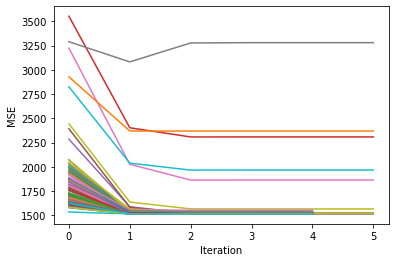

In [19]:
for x in range(100):
    
    this_data = data.sample(n=1, random_state=x, axis=1)
    this_data = pd.concat([this_data, data[[_this]]], axis=1)
    print([gene_map[i] for i in this_data.columns.tolist()])
    
    X_train, X_test, y_train, y_test, feature_labels = split_data(this_data, [_this], test_fraction=0.3)
    
    final_weights, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="random", 
    regression_type="logistic",
    gaussian_sd=0.2)

    plt.plot([i for i in range(len(mse_record))], mse_record)
    plt.xlabel("Iteration")
    plt.ylabel("MSE")

['RTC1', 'RBK1', 'CRC1', 'MRPL50', 'PWP2', 'MKK1', 'YGL185C', 'YNL144C', 'GEP4', 'SPS1', 'AVT4', 'UBP9', 'PET122', 'HEH2', 'MFA2', 'YGR237C', 'FUN30', 'CRF1', 'TIM17', 'YMR122W-A', 'KXD1', 'ISA1', 'CAK1', 'MSH1', 'KEL1', 'AXL2', 'PAL1', 'DHH1', 'TRS20', 'SKI3', 'ADK1', 'CUP2', 'NNK1', 'PCA1', 'CWC24', 'HUR1', 'NOP15', 'SCH9', 'YRB1', 'TCO89', 'ERG20', 'BAT1', 'YNL040W', 'AIM21', 'STP3', 'DEF1', 'FDC1', 'ACL4', 'ADH5', 'SSM4', 'FOL3', 'UTP22', 'ERV46', 'MIP6', 'KAR9', 'RPP1B', 'UBP2', 'SPT4', 'PIN2', 'MDM1', 'DAN4', 'LST7', 'YBR230W-A', 'VPS21', 'YBR225W', 'MVP1', 'TRM1', 'DGR2', 'VID30', 'VAM7', 'RPF1', 'PTK2', 'DYN2', 'VHS2', 'KIN28', 'SEC39', 'ENP1', 'EMP47', 'SRP72', 'RRP14', 'CYR1', 'COG5', 'POP5', 'RRP8', 'PRE4', 'YML053C', 'VMA9', 'YMC1', 'PSP2', 'BOL1', 'ARP2', 'YNL146C-A', 'OPI10', 'SRP102', 'RPS7B', 'MTR4', 'RPS8A', 'PRP8', 'RCM1', 'YER158C', 'CTP1']
Initializing zero weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 3.36, MSE

	Iteration: 3, Change in weights: 8836.528, MSE: 2031.246, R_sq: 0.082
	Iteration: 4, Change in weights: 33580.559, MSE: 1563.659, R_sq: 0.011
	Iteration: 5, Change in weights: 117279.49, MSE: 1516.101, R_sq: nan
	Iteration: 6, Change in weights: 1891.699, MSE: 1516.101, R_sq: nan
	Iteration: 7, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['CTS1', 'KRE28', 'CAR2', 'KAR3', 'TRM12', 'MUM2', 'ATG18', 'ASP1', 'RPP1', 'ISR1', 'ARG5,6', 'ADH6', 'MZM1', 'YIL161W', 'AHC2', 'ARB1', 'RLP7', 'DIE2', 'UBP2', 'ADE17', 'ERO1', 'GPD1', 'MSA2', 'TRM44', 'ARF1', 'TIM23', 'SUT2', 'UBR2', 'RTC4', 'RPS1B', 'PSR2', 'NTH2', 'LRE1', 'RPL36B', 'SKT5', 'AIM29', 'SPI1', 'ERF2', 'PAC10', 'IPK1', 'SSN8', 'ATG29', 'COF1', 'ARG7', 'ARE2', 'YOS1', 'PUS1', 'TOG1', 'CYC2', 'SRO77', 'HSE1', 'PRE6', 'STE18', 'YTA6', 'FIR1', 'SMP3', 'YDL129W', 'MRH4', 'TCA17', 'ECT1', 'ICL2', 'ATP20', 'SOK1', 'TOH1', 'CTM1', 'ADH5', 'ALY1', 'SYN8', 'CEF1', 'YHR138C', 'CPS1', 'ALE1', 'MTH1', 'CDC20', 'FKH2', 'SHE1'

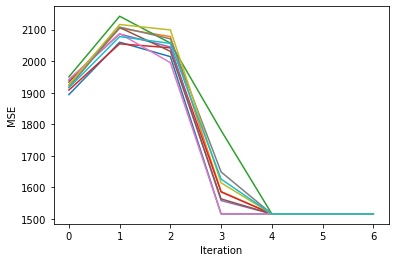

In [20]:
for x in range(10):
    
    this_data = data.sample(n=100, random_state=x, axis=1)
    this_data = pd.concat([this_data, data[[_this]]], axis=1)
    print([gene_map[i] for i in this_data.columns.tolist()])
    
    X_train, X_test, y_train, y_test, feature_labels = split_data(this_data, [_this], test_fraction=0.3)
    
    final_weights, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="zero", 
    regression_type="logistic",
    gaussian_sd=0.2)

    plt.plot([i for i in range(len(mse_record))], mse_record)
    plt.xlabel("Iteration")
    plt.ylabel("MSE")

['RTC1', 'CTP1']
Initializing zero weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 3.045, MSE: 1690.949, R_sq: 0.013
	Iteration: 2, Change in weights: 23.391, MSE: 1522.218, R_sq: 0.001
	Iteration: 3, Change in weights: 5946.541, MSE: 1519.93, R_sq: 0.0
	Iteration: 4, Change in weights: 145.35, MSE: 1519.93, R_sq: 0.0
	Iteration: 5, Change in weights: 0.0, MSE: 1519.93, R_sq: 0.0
Training complete.
['DIM1', 'CTP1']
Initializing zero weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 2.152, MSE: 1732.004, R_sq: 0.048
	Iteration: 2, Change in weights: 24.302, MSE: 1516.674, R_sq: 0.001
	Iteration: 3, Change in weights: 11794.403, MSE: 1516.101, R_sq: nan
	Iteration: 4, Change in weights: 115.532, MSE: 1516.101, R_sq: nan
	Iteration: 5, Change in weights: 0.0, MSE: 1516.101, R_sq: nan
Training complete.
['EPS1', 'CTP1']
Initializing zero weights...
Performing MAP estimation with Newton-R

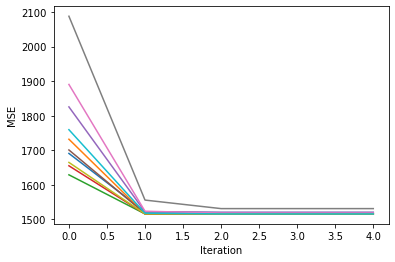

In [21]:
for x in range(10):
    
    this_data = data.sample(n=1, random_state=x, axis=1)
    this_data = pd.concat([this_data, data[[_this]]], axis=1)
    print([gene_map[i] for i in this_data.columns.tolist()])
    
    X_train, X_test, y_train, y_test, feature_labels = split_data(this_data, [_this], test_fraction=0.3)
    
    final_weights, mse_record = newton_solver(
    training_data=X_train, 
    training_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    initialization_type="zero", 
    regression_type="logistic",
    gaussian_sd=0.2)

    plt.plot([i for i in range(len(mse_record))], mse_record)
    plt.xlabel("Iteration")
    plt.ylabel("MSE")

['CTP1', 'CTP1']
Initializing random weights...
Performing MAP estimation with Newton-Raphson solver...
	Iteration: 1, Change in weights: 0.0, MSE: 19301.998, R_sq: 1.0
Training complete.


Text(0, 0.5, 'MSE')

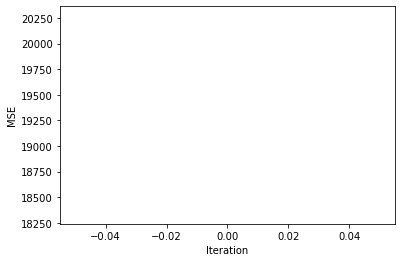

In [22]:
this_data = data[[_this]]
this_data = pd.concat([this_data, data[[_this]]], axis=1)
print([gene_map[i] for i in this_data.columns.tolist()])

X_train, X_test, y_train, y_test, feature_labels = split_data(this_data, [_this], test_fraction=0.3)

final_weights, mse_record = newton_solver(
training_data=X_train, 
training_labels=y_train, 
test_data=X_test, 
test_labels=y_test, 
initialization_type="random", 
regression_type="logistic",
gaussian_sd=0.2)

plt.plot([i for i in range(len(mse_record))], mse_record)
plt.xlabel("Iteration")
plt.ylabel("MSE")